In [ ]:
import json
import pandas as pd
import pickle
try:
    %matplotlib inline
except Exception as e:
    pass

import warnings
warnings.filterwarnings("ignore")
import util


In [ ]:
# from random import randint

# data = []
# first_5_years = [randint(8,10) for _ in range(12*5)] # 60 months
# year_6 = []
# for i in range(6):
#     a = 8-i
#     b = 10-i
#     year_6.append(randint(a,b))
# year_6.extend([randint(2,5), 2, 3, 3, 4, 5])
# grades = first_5_years + year_6
# ser = pd.Series(grades, name='Grades')
# ser[-12:]

In [ ]:
if False: 
    with open('./efficient_frontier_scratch.pickle',mode='w+b') as f:
        pickle.dump(ser,f)

In [ ]:
with open('./efficient_frontier_scratch.pickle',mode='r+b') as f:
    ser:pd.Series = pickle.load(f)
ser[-24:]

In [ ]:
# last_year = []
# for i in range(12):
#     a = min(i+4,8)
#     b = min(i+6,10)
#     last_year.append(randint(a,b))
# last_year

In [ ]:
# last_year2 = [6,5,6,7,7,8,7,8,9,randint(8,10),randint(8,10),randint(8,10)]

In [ ]:
# last_year = last_year2

In [ ]:
# grades2 = grades+last_year
# ser2  = pd.Series(grades2)
# ser2[-24:]
# ser = ser2

In [33]:
ser:pd.Series
short_ema = ser.ewm(span=12,adjust=False).mean()

0     10.000000
1      9.692308
2      9.585799
3      9.649522
4      9.703442
        ...    
79     6.436642
80     6.831004
81     7.318542
82     7.577228
83     7.949962
Length: 84, dtype: float64

In [31]:
long_ema = ser.ewm(span=24,adjust=False).mean()

0     10.000000
1      9.840000
2      9.772800
3      9.790976
4      9.807698
        ...    
79     6.447337
80     6.651550
81     6.919426
82     7.085872
83     7.319002
Length: 84, dtype: float64

In [44]:
emas = pd.DataFrame(dict(Short=short_ema, Long=long_ema))

,Short,Long
0,10.000000,10.000000
1,9.692308,9.840000
2,9.585799,9.772800
3,9.649522,9.790976
4,9.703442,9.807698
...,...,...
79,6.436642,6.447337
80,6.831004,6.651550
81,7.318542,6.919426
82,7.577228,7.085872


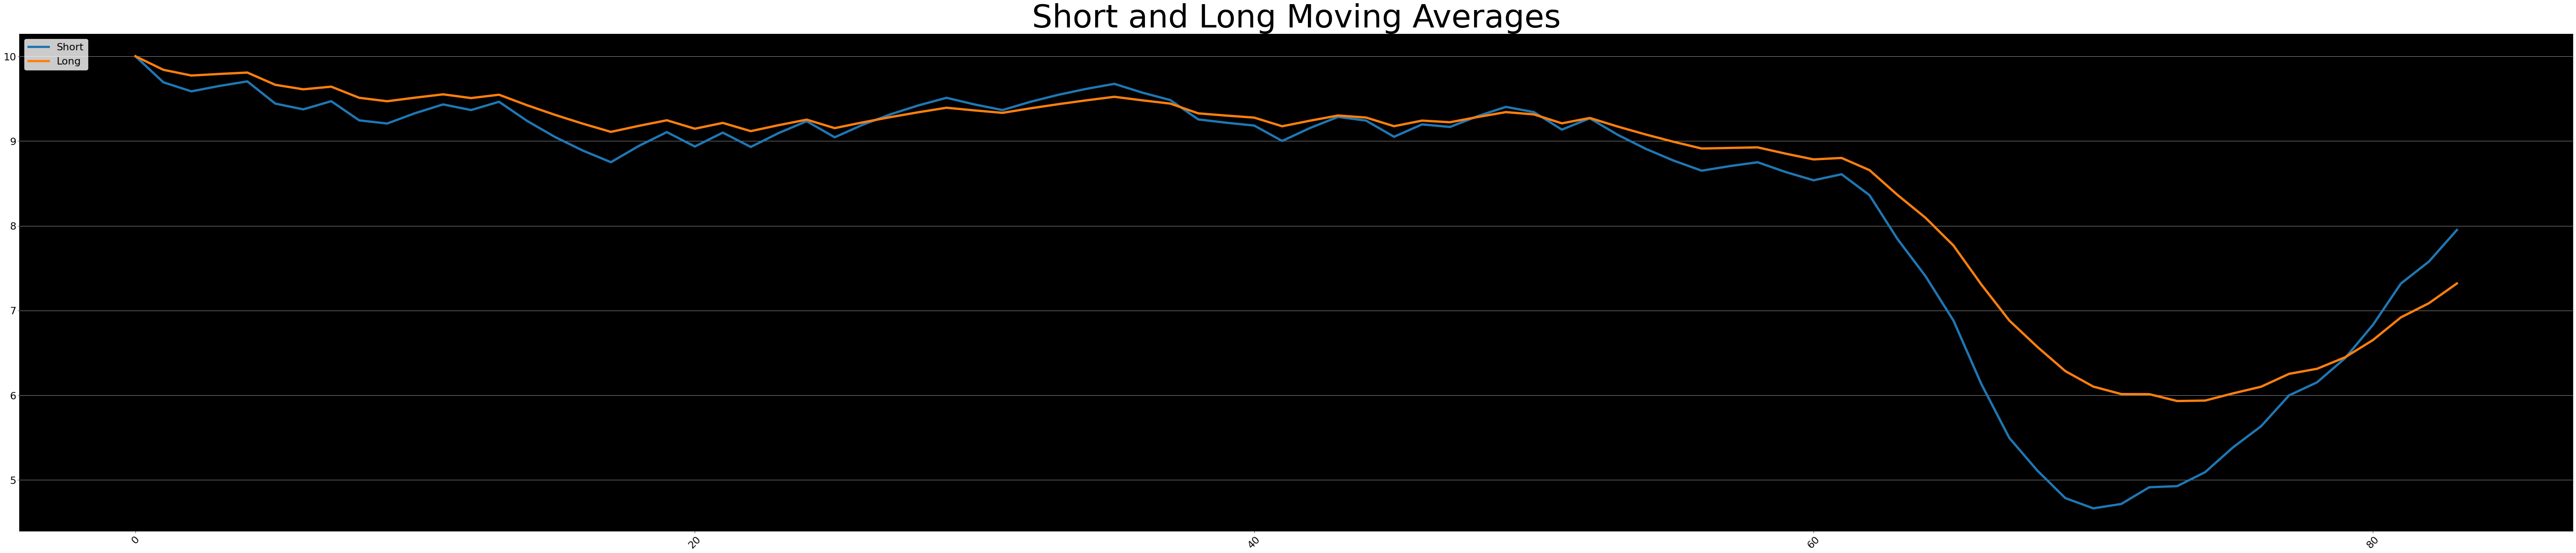

In [56]:
util.plot(df,title='Short and Long Moving Averages')

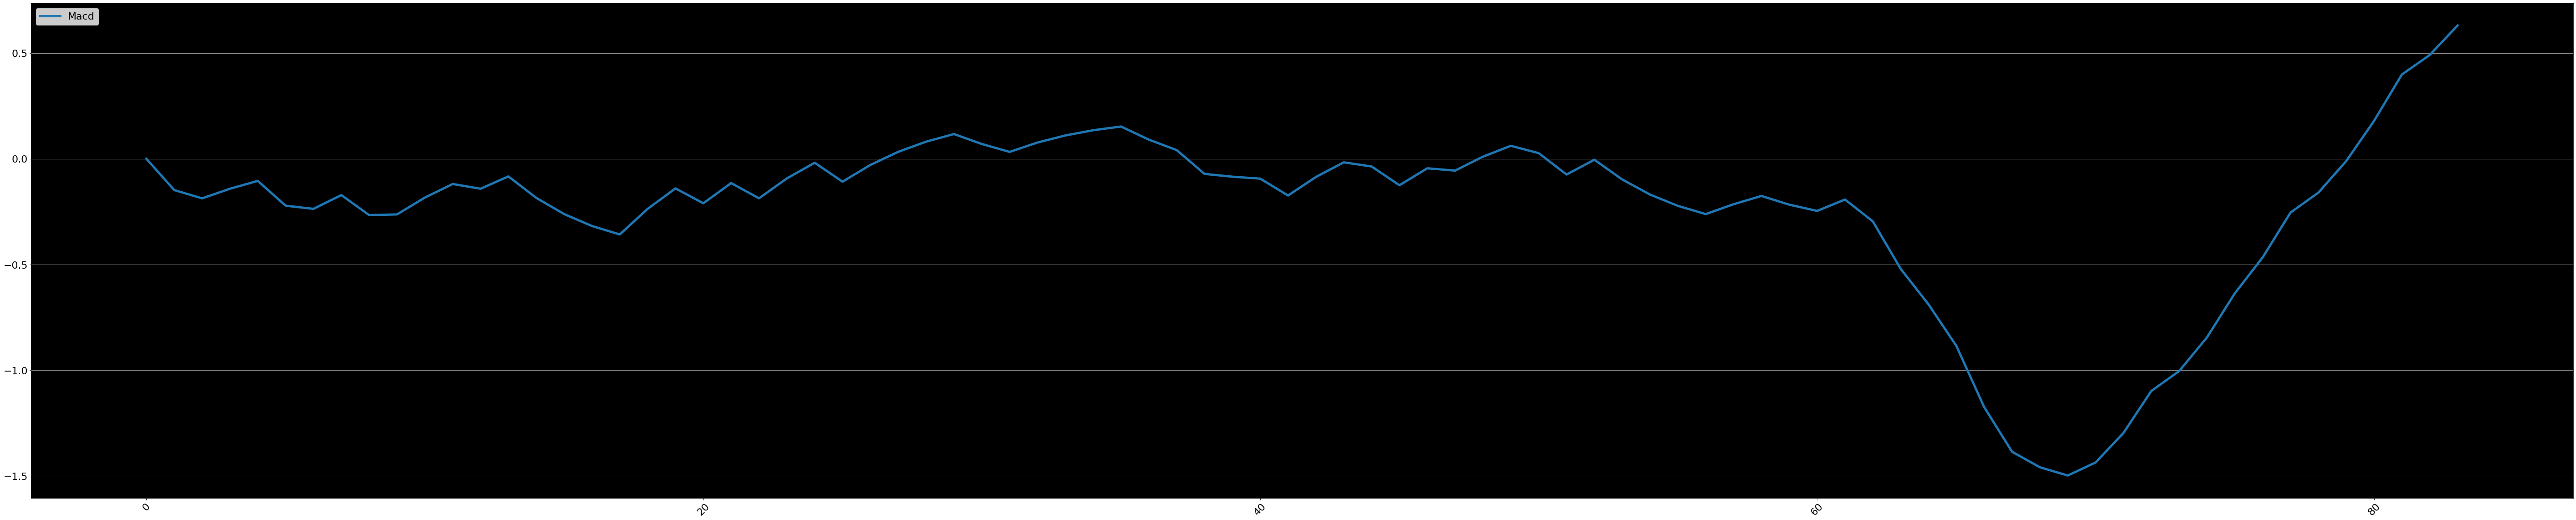

In [60]:
macd = (short_ema - long_ema).to_frame().set_axis(['MACD'],axis=1)
util.plot(macd)

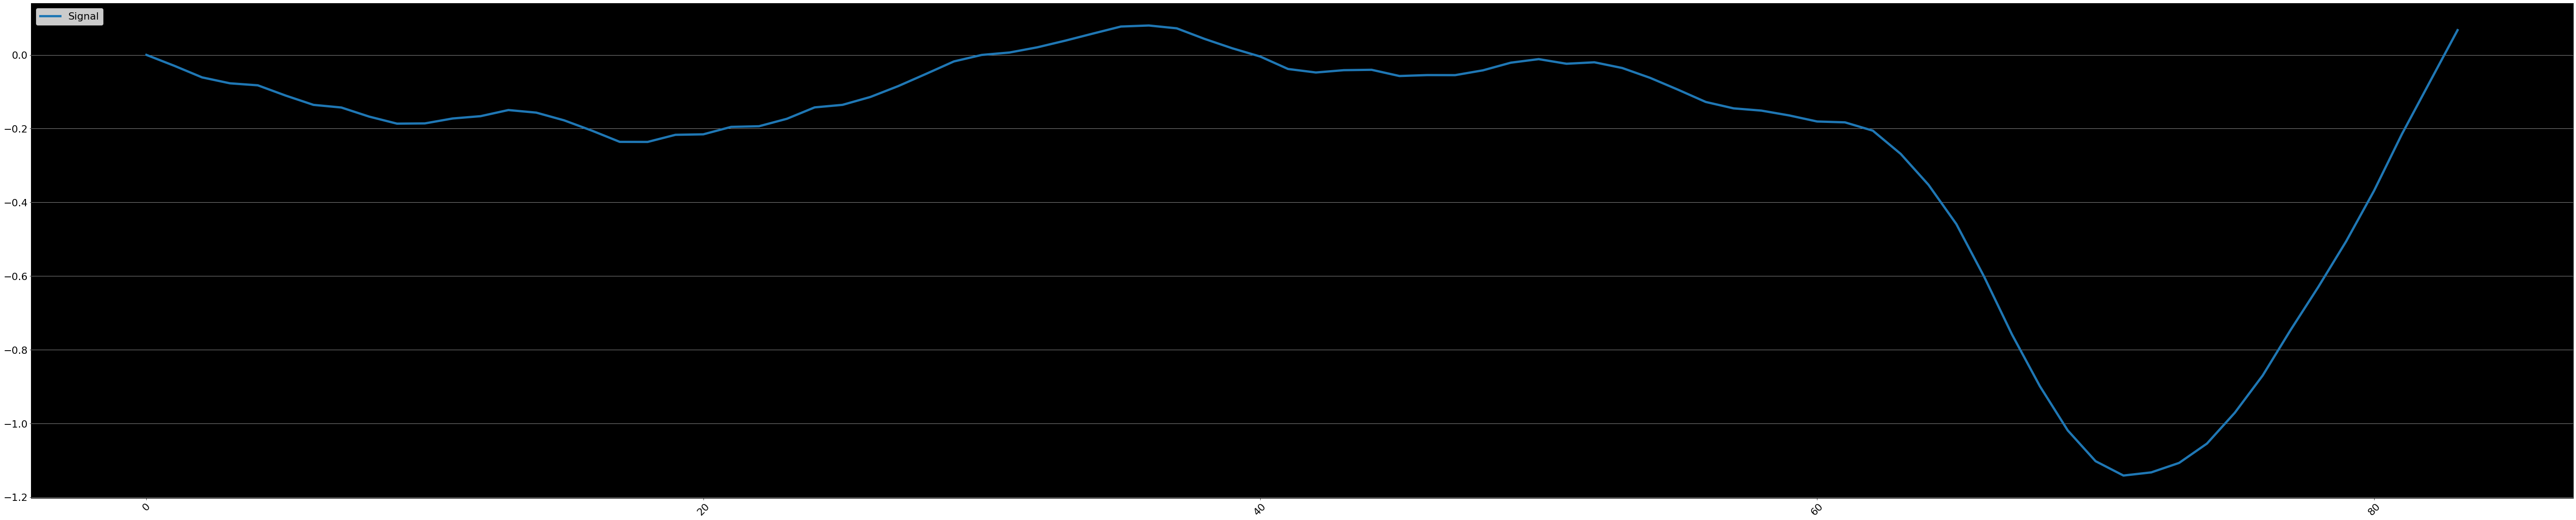

In [61]:
signal = macd.ewm(span=9,adjust=False).mean().set_axis(['Signal'],axis=1)
util.plot(signal)

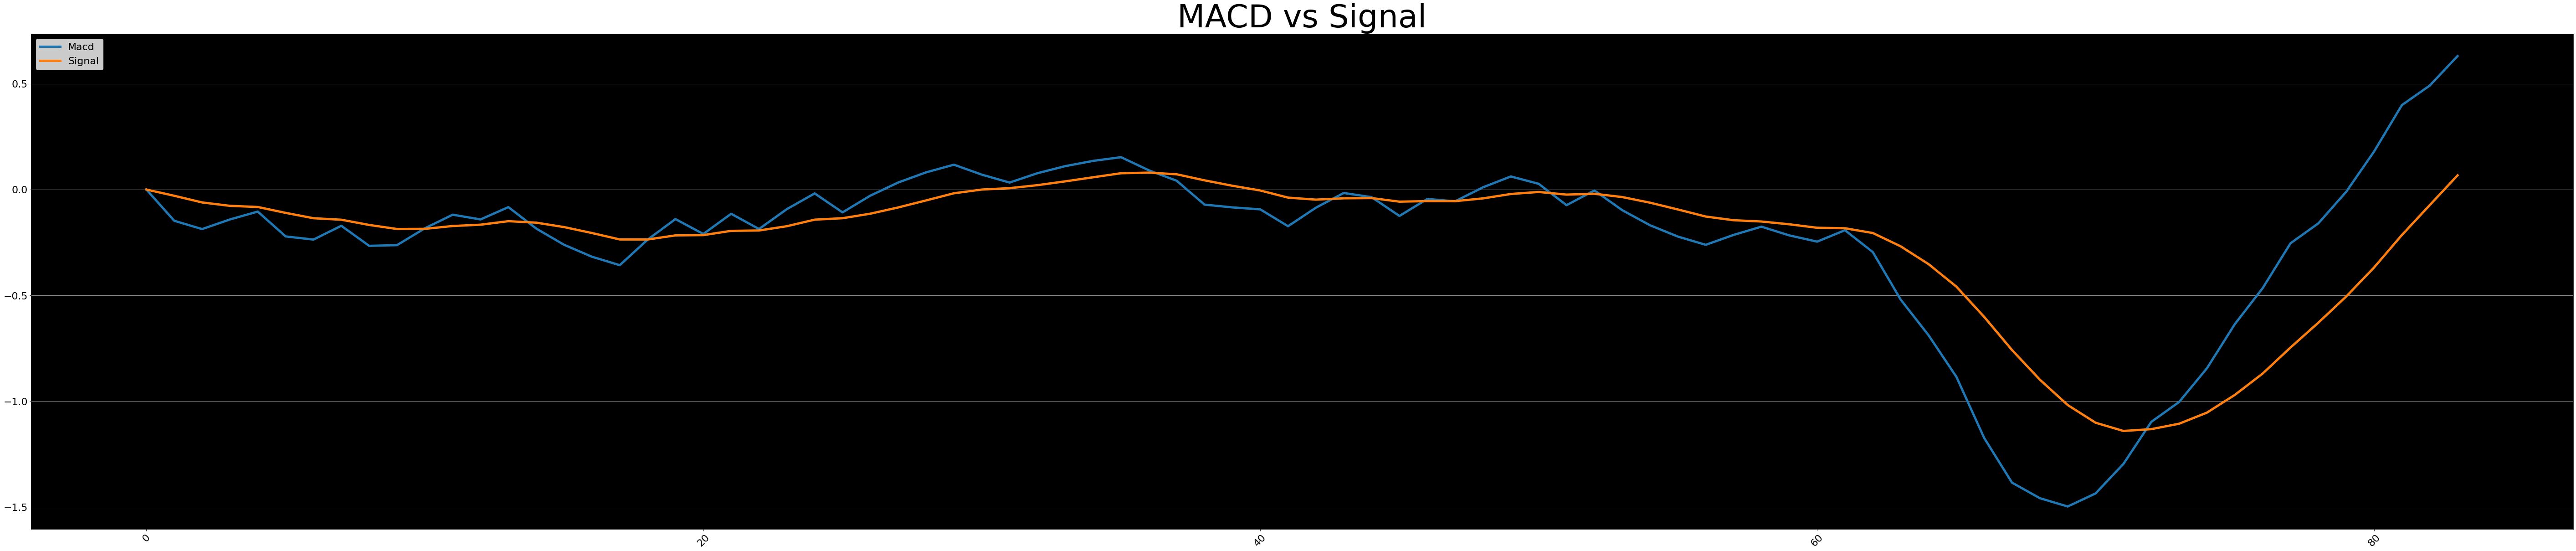

In [64]:
util.plotmany(macd.index, [
    macd,
    signal
], title='MACD vs Signal')